# Подготовительный этап
Запускаем подключение необходимых модулей и работу вспомогательных функций

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

# Функция, возвращающая фундаментальные показатели компании
def fundamental_data(ticker):
    global current_price, PE, FPE, PEG, EPS, FEPS, price_to_book, ROE, revenue_per_share, divedend, current_ratio
    info = yf.Ticker(ticker).info
    try:
        current_price = info['currentPrice']
    except:
        current_price = 'ERROR'
    try:
        PE = round(info['trailingPE'], 3)
    except:
        PE = 'ERROR'
    try:
        FPE = round(info['forwardPE'], 3)
    except:
        FPE = 'ERROR'
    try:
        EPS = round(info['trailingEps'], 3)
    except:
        EPS = 'ERROR'
    try:
        FEPS = round(info['forwardEps'], 3)
    except:
        FEPS = 'ERROR'
    try:
        price_to_book = round(info['priceToBook'], 3)
    except:
        price_to_book = 'ERROR'
    try:
        ROE = round(info['returnOnEquity'], 3)
    except:
        ROE = 'ERROR'
    try:
        revenue_per_share = round(info['revenuePerShare'], 3)
    except:
        revenue_per_share = 'ERROR'
    try:
        divedend = round(info['dividendYield'], 3)
    except:
        divedend = 'ERROR'
    try:
        current_ratio = round(info['currentRatio'], 3)
    except:
        current_ratio = 'ERROR'
    try:
        PEG = round(info['pegRatio'], 3)
    except:
        PEG = 'ERROR'
    return current_price, PE, FPE, PEG, EPS, FEPS, price_to_book, ROE, revenue_per_share, divedend, current_ratio

# Single Stock Analisys Script
Выводит графики объема торгов, цены акции и список фундаментальных показателей акции по запроссу

In [102]:
def stock (AVG_type = 'ewm',period = '1Y'):
    sns.set_theme(rc = ({'figure.figsize':(20, 3)}))
    ticker = input('Ticker:')
    get_yf_object = yf.Ticker(ticker) 
    data = get_yf_object.history(period = period)
    volume_rolling_45 = data[['Volume']].rolling(window = 45).mean()
    sns.lineplot(data = data, x = 'Date', y = 'Volume', label = 'Volume')
    sns.lineplot(data = volume_rolling_45, x = 'Date', y = 'Volume', label = '45D_SMA')
    plt.title('Volume ' + ticker, fontsize = 17)
    plt.show()
    sns.lineplot(data = data, x = 'Date', y = 'Close', label = 'Average')
    if AVG_type == 'ewm':
        # Екпоненциально взвешенное скользящее среднее
        ewm_20 = data[['Close']].ewm(span = 20, adjust= False).mean()
        ewm_50 = data[['Close']].ewm(span = 50, adjust= False).mean()
        sns.lineplot(data = ewm_20, x = 'Date', y = 'Close', label = '20D_EWM')
        sns.lineplot(data = ewm_50, x = 'Date', y = 'Close', label = '50D_EWM')
    elif AVG_type == 'sma':
        # Простое скользящее среднее
        rolling_20 = data[['Close']].rolling(window = 20).mean()
        rolling_50 = data[['Close']].rolling(window = 50).mean()
        sns.lineplot(data = rolling_20, x = 'Date', y = 'Close', label = '20D_SMA')
        sns.lineplot(data = rolling_50, x = 'Date', y = 'Close', label = '50D_SMA')
    else:
        print('Тип скользящей средней выбран непраильно. Введите либо "emv", либо "sma"')
    plt.title('Stock prices ' + ticker, fontsize = 17)
    plt.show()
# Построение граффиков изменения выручки и прибыли по кварталам и годам   
    qearnings = get_yf_object.quarterly_earnings.reset_index()
    yearnings = get_yf_object.earnings.reset_index()
    sns.set_theme(rc = ({'figure.figsize':(20, 3)}))
    plt.subplot(1, 4, 3)
    sns.barplot(data= yearnings, x = 'Year', y = 'Revenue', color = 'deepskyblue')
    plt.subplot(1, 4, 4)
    sns.barplot(data= yearnings, x = 'Year', y = 'Earnings', color = 'olivedrab')
    plt.subplot(1, 4, 1)
    sns.barplot(data = qearnings, x = 'Quarter', y = 'Revenue', color = 'deepskyblue')
    plt.subplot(1, 4, 2)
    sns.barplot(data = qearnings, x = 'Quarter', y = 'Earnings', color = 'olivedrab')
    plt.show()
# Функция, возвращающая фундаментальные показатели компании    
    fundamental_data(ticker)
    print('Current price={}, P/S={}, P/E={}, FP/E={}, PEG={}, EPS={}, FEPS={}, Eps/Current price={},\n \
          P/B={}, ROE={}, Divedend yield={}, Current ratio={}'.
         format(current_price, round(current_price/revenue_per_share, 3), PE, FPE, PEG, EPS, FEPS, round(EPS/current_price, 3),
                price_to_book, ROE, divedend, current_ratio))

 - P/E - показатель отношения стоимости компании к ее годовой прибыли
 
 - P/S (P/R) - показатель отношения стоимости компании к ее годовой выручке
 
 - PEG = (P/E)/Grows - показатель хоррактеризующий как оценена компания в настоящий момент с учетом роста ее прибыли в будущем.

 - P/B показывает на сколько справедливо оценена компания к своей балансовой стоимости. Т.е P/B = капитализация компании/(активы компании - долги компании)
 
 - current ratio(Коэффициент текущей ликвидности) отношение текущих активов компании к ее текущим обязательствам. Показывает как на сколько наши активы, относительно быстро реализуемые, позволяют погасить наши обязательства (без догосрочных обязательств и обзательств в разделе капитал). Показывает на сколько мы можем прямо здесь и сейчас погасить наши долги

Ticker:PFE


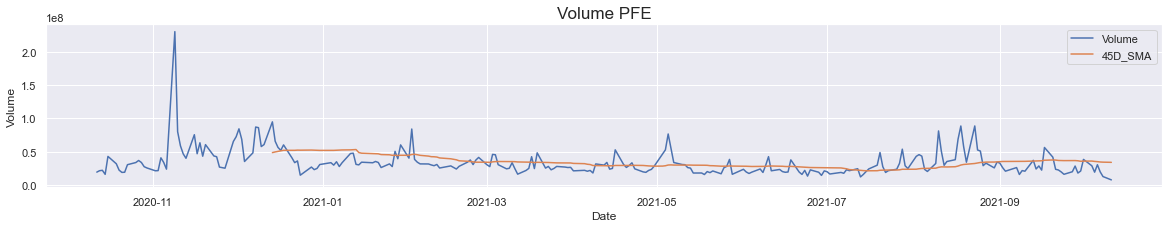

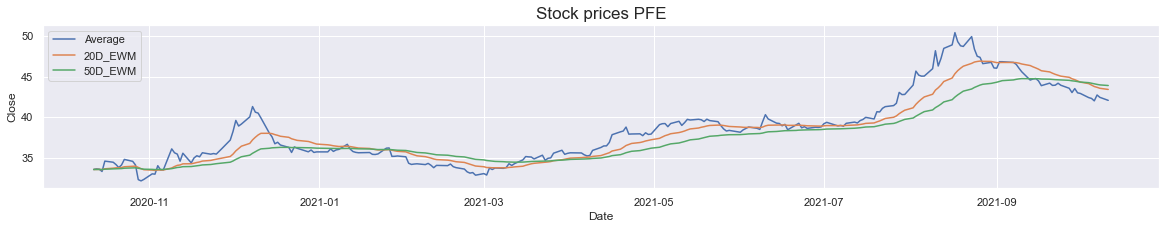

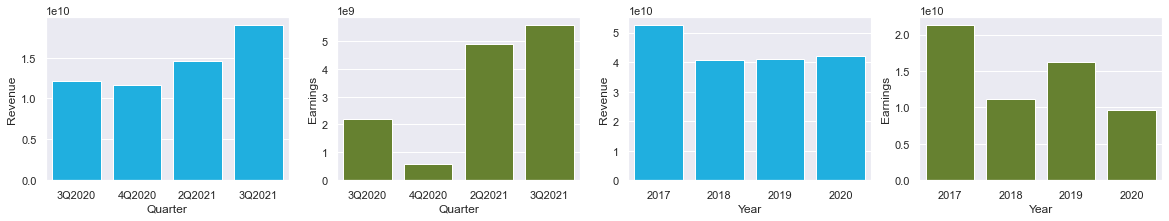

Current price=42.0809, P/S=4.226, P/E=17.968, FP/E=11.282, PEG=0.92, EPS=2.342, FEPS=3.73, Eps/Current price=0.056,
           P/B=3.364, ROE=0.184, Divedend yield=0.037, Current ratio=1.369


In [103]:
stock('ewm', '1Y')

# Fundamental Data Table
Формирует объект DataFrame, содержащий в себе фундаментальные показатели акций множества акций

In [99]:
# Получаем список тикеров, данные которых будут содержаться в таблице
nasdaq_screener = pd.read_csv('C:\\Users\\julia\\Downloads\\nasdaq_screener.csv') \
                    .sort_values(by = 'Market Cap', ascending = False) \
                    .reset_index(drop = True)
sorted_tickers = nasdaq_screener[nasdaq_screener['Industry']=='Biotechnology: Pharmaceutical Preparations'][:3]

In [100]:
# формируем DataFrame на основании интересующего списка тикеров
i = 0    
stocks = []
for ticker in sorted_tickers['Symbol']:
    fundamental_data(ticker)
    stocks.append([ticker, current_price, round(current_price/revenue_per_share, 3), PE, FPE, PEG, EPS, FEPS, round(EPS/current_price, 3), \
                   price_to_book, ROE, divedend, current_ratio])
    print(i)
    i +=1
    
stocks_df = pd.DataFrame(stocks, columns = ['ticker', 'current price', 'P/S', 'P/E', 'FP/E', 'PEG', 'EPS', 'FEPS', 
                                            'EPS/current price', 'P/B', 'ROE', 'divedend', 'current ratio'])
stocks_df

0
1
2


,ticker,current price,P/S,P/E,FP/E,PEG,EPS,FEPS,EPS/current price,P/B,ROE,divedend,current ratio
0,JNJ,160.21,4.728,24.084,15.375,2.04,6.652,10.42,0.042,6.060,0.268,0.026,1.389
1,PFE,42.12,4.230,17.985,11.292,0.92,2.342,3.73,0.056,3.367,0.184,0.037,1.369
2,LLY,234.73,7.974,35.298,32.829,2.53,6.650,7.15,0.028,33.019,1.110,0.015,1.146


In [123]:
# получаем информацию базовую информацию о тикерах
nasdaq_screener[nasdaq_screener['Symbol'] == 'AAPL']

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$143.29,1.29,0.908%,2.484267e+12,United States,1980.0,61732656,Technology,Computer Manufacturing


In [49]:
test = yf.Ticker('PFE')

In [50]:
qearnings = test.quarterly_earnings.reset_index()
yearnings = test.earnings.reset_index()

In [8]:
qearnings['earnings diff'] = qearnings['Earnings']/qearnings['Earnings'].shift(1)
qearnings['revenue diff'] = qearnings['Revenue']/qearnings['Revenue'].shift(1)

<AxesSubplot:xlabel='Quarter', ylabel='Earnings'>

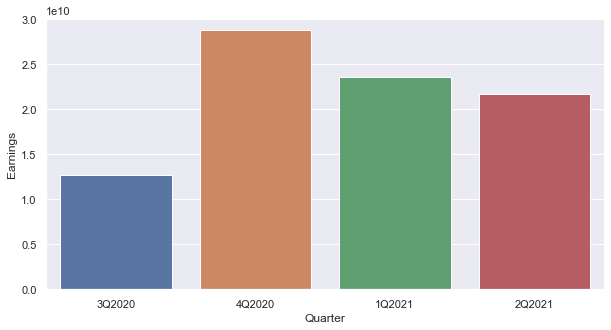

In [35]:
sns.set_theme(rc = {'figure.figsize':(10, 5)})
sns.barplot(data = qearnings, x = 'Quarter', y = 'Earnings')
#sns.lineplot(data = qearnings, x = 'Quarter', y = 'earnings diff', color = 'red')

#### Нужно поработать над созданием датафрейма, который будет содержать необходимые признаки для построения модели
#### Нужно добавить динамику выручки и прибыли из yf.Ticker().earnings(quarterly_earnings)
- добавить на граффик маркеры изменения к предыдущему периоду
- добавить 2ю ось "у", на барплот с выручкой, который будет отображать процентное изменение выручки

In [51]:
test.info

{'zip': '10017',
 'sector': 'Healthcare',
 'fullTimeEmployees': 78500,
 'longBusinessSummary': 'Pfizer Inc. discovers, develops, manufactures, markets, distributes, and sells biopharmaceutical products worldwide. It offers medicines and vaccines in various therapeutic areas, including cardiovascular metabolic and pain under the Eliquis, Chantix/Champix, and Premarin family brands; biologics, small molecules, immunotherapies, and biosimilars under the Ibrance, Xtandi, Sutent, Inlyta, Retacrit, Lorbrena, and Braftovi brands; and sterile injectable and anti-infective medicines under the Sulperazon, Medrol, Zithromax, Vfend, and Panzyga brands. The company also provides medicines and vaccines in various therapeutic areas, such as pneumococcal disease, meningococcal disease, tick-borne encephalitis, and COVID-19 under the Prevnar 13/Prevenar 13 (pediatric/adult), Nimenrix, FSME/IMMUN-TicoVac, Trumenba, and the Pfizer-BioNTech COVID-19 vaccine brands; biosimilars for chronic immune and infla

In [93]:
test_df = test.history(period = '2y').reset_index()
test_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-10-11,31.674454,32.060087,31.613103,31.648159,18446054,0.0,0.0
1,2019-10-14,31.691984,31.858509,31.534227,31.814686,8700981,0.0,0.0
2,2019-10-15,31.946156,32.200323,31.911100,31.989979,15178232,0.0,0.0
3,2019-10-16,32.103916,32.209086,31.832217,31.849745,14435795,0.0,0.0
4,2019-10-17,31.981209,32.261668,31.876035,31.954914,15312090,0.0,0.0


In [94]:
test_df['diff'] = test_df['Close']/test_df['Close'].shift(1)

In [95]:
test_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff
0,2019-10-11,31.674454,32.060087,31.613103,31.648159,18446054,0.0,0.0,NaN
1,2019-10-14,31.691984,31.858509,31.534227,31.814686,8700981,0.0,0.0,1.005262
2,2019-10-15,31.946156,32.200323,31.911100,31.989979,15178232,0.0,0.0,1.005510
3,2019-10-16,32.103916,32.209086,31.832217,31.849745,14435795,0.0,0.0,0.995616
4,2019-10-17,31.981209,32.261668,31.876035,31.954914,15312090,0.0,0.0,1.003302
...,...,...,...,...,...,...,...,...,...
499,2021-10-05,42.529999,42.790001,42.279999,42.320000,19342600,0.0,0.0,0.997643
500,2021-10-06,42.060001,42.200001,41.689999,42.020000,30483800,0.0,0.0,0.992911
501,2021-10-07,42.520000,42.959999,42.209999,42.740002,19778300,0.0,0.0,1.017135
502,2021-10-08,42.730000,42.910000,42.340000,42.450001,12770200,0.0,0.0,0.993215


In [98]:
test_df.sort_values(by = 'Dividends', ascending = False).head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff
394,2021-05-06,38.134608,38.877876,37.619275,38.838234,54944900,0.390000,0.0,0.990146
326,2021-01-28,35.279694,35.652610,35.171744,35.191372,39466700,0.390000,0.0,1.000279
452,2021-07-29,43.230000,43.299999,42.619999,42.790001,29015000,0.390000,0.0,0.993730
270,2020-11-05,34.309349,34.355399,33.517239,33.517239,33926995,0.360531,0.0,0.984844
143,2020-05-07,34.678708,34.750939,33.306368,33.369568,33546080,0.360531,0.0,0.969315
75,2020-01-30,33.165443,33.228019,32.798923,33.138622,32316589,0.360531,0.0,0.996505
201,2020-07-30,34.899128,35.500838,34.826194,35.318501,32273796,0.360531,0.0,0.996399
19,2019-11-07,33.095552,33.254833,32.635400,32.661945,22727297,0.341556,0.0,0.990872
0,2019-10-11,31.674454,32.060087,31.613103,31.648159,18446054,0.000000,0.0,NaN
337,2021-02-12,33.797842,34.298335,33.719336,34.072624,25578600,0.000000,0.0,1.008423


In [89]:
test_df['Dividends'].sum()

1.530531